In [19]:
import pandas as pd
import datetime as dt
import numpy as np
import requests
import tempfile
from google.cloud import bigquery
# from google.cloud import bigquery_storage_v1
# from functools import partialmethod

In [ ]:
client = bigquery.Client.from_service_account_json('./lwapps-coloring.json')
# bigquery_storage_v1.client.BigQueryReadClient.read_rows = partialmethod(bigquery_storage_v1.client.BigQueryReadClient.read_rows, timeout=3600*2) 
# bq_storage_client = bigquery_storage_v1.BigQueryReadClient.from_service_account_json('./lwapps-coloring.json')
project_id = 'lwapps-coloring'

Dropdown(description='Number:', index=1, options=(('One', 1), ('Two', 2), ('Three', 3)), value=2)

IntSlider(value=0)

### Retention

In [ ]:
# Забираем все ивенты пользователей
sql = '''   
SELECT event_date, event_timestamp, event_name, user_id, platform
FROM `lwapps-coloring.analytics_218793363.events_*`
where (_TABLE_SUFFIX between '20210315' AND '20210331') 
and platform = 'ANDROID' 
and app_info.version = '1.18'
'''
android = client.query(sql, project=project_id).to_dataframe()
android = android[~android.user_id.isna()]
android['event_timestamp'] = pd.to_datetime(android['event_timestamp']/1000, unit='ms')

sql = '''   
SELECT event_date, event_timestamp, event_name, user_id, platform
FROM `lwapps-coloring.analytics_218793363.events_*`
where (_TABLE_SUFFIX between '20210315' AND '20210331') 
and platform = 'IOS' 
and app_info.version = '1.23'
'''
ios = client.query(sql, project=project_id).to_dataframe()
ios = ios[~ios.user_id.isna()]
ios['event_timestamp'] = pd.to_datetime(ios['event_timestamp']/1000, unit='ms')

In [ ]:
### DAU


In [ ]:
### Cреднее кол-во показов интера на юзера


In [ ]:
### TDPT(total daily play time)


In [ ]:
### Cреднее время сессии


### Количество закрашенных картинок на человека


In [ ]:
# platform, media source, campaign, adset, country code, app version, install date, date, device type

# USERS 
sql = '''
SELECT customer_user_id, min(install_date) as min_install_date
FROM `goingtoclouds.appsflyer_happy_canvas.v_appsflyer_registration`
WHERE 
    install_date between "2021-04-01"  and "2021-04-26"
    /* As well the query shoul be filtered by platform, media_source, 
    campaign, adset, country_code, app_version */
group by customer_user_id
'''
ios = client.query(sql, project=project_id).to_dataframe()

# FINISHED pics
sql = '''
select distinct user_id, event_date 
from `lwapps-coloring.analytics_218793363.events_*`
where (_TABLE_SUFFIX between '20210401' AND '20210426') 
and event_name = 'core_picture_finish' /* For analysis of started pictures use "core_picture_start" event */
and device.category in ('mobile', 'tablet')
and platform in ('IOS', 'ANDROID')
and country_code != 'BY'
and app_info.version = '2.0.3'
'''
ios = client.query(sql, project=project_id).to_dataframe()

### Количество начатых картинок на человека

In [37]:
import ipywidgets as widgets

# Additionally necessary to add filtration by campaign and adset
platform = widgets.Dropdown(
    options=['all', 'ios', "android"],
    value='all',
    description='platform:',
)

device_type = widgets.Dropdown(
    options=['all', 'mobile', "tablet"],
    value='all',
    description='device type:',
)

media_source = widgets.Dropdown(
    options=['all', "organic", "applovin_int", "restricted", "unityads_int", "googleadwords_int", "Facebook Ads"],
    value='all',
    description='media source:',
)

country_code = widgets.Dropdown(
    options=['all', 'ios', "android"],
    value='all',
    description='country:',
)

app_version =  widgets.Dropdown(
    options=['all', 'ios', "android"],
    value='all',
    description='app version:',
)

# Parameters for date sliders
start_date = dt.date(2021, 4, 1)
end_date = dt.date(2021, 4, 26)

install_dates = pd.date_range(start_date, end_date, freq='D')
visit_dates = pd.date_range(start_date, end_date, freq='D')

install_options = [(date.strftime(' %d %b %Y '), date) for date in install_dates]
install_index = (0, len(install_options)-10)

visit_options = [(date.strftime(' %d %b %Y '), date) for date in visit_dates]
visit_index = (10, len(visit_options)-1)

install_range_slider = widgets.SelectionRangeSlider(
    options=install_options,
    index=install_index,
    description='Install Dates',
    orientation='horizontal',
    layout={'width': '400px'}
)

date_range_slider = widgets.SelectionRangeSlider(
    options=visit_options,
    index=visit_index,
    description='Visit Dates',
    orientation='horizontal',
    layout={'width': '400px'}
)


display(platform, device_type, media_source, country_code, app_version, install_range_slider, date_range_slider)


sql = '''

'''

# %matplotlib notebook
# from ipywidgets import *
# import numpy as np
# import matplotlib.pyplot as plt

# x = np.linspace(0, 2 * np.pi)
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)
# line, = ax.plot(x, np.sin(x))

# def update(w = 1.0):
#     line.set_ydata(np.sin(w * x))
#     fig.canvas.draw_idle()

# interact(update);

Dropdown(description='platform:', options=('all', 'ios', 'android'), value='all')

Dropdown(description='device type:', options=('all', 'mobile', 'tablet'), value='all')

Dropdown(description='media source:', options=('all', 'organic', 'applovin_int', 'restricted', 'unityads_int',…

Dropdown(description='country:', options=('all', 'ios', 'android'), value='all')

Dropdown(description='app version:', options=('all', 'ios', 'android'), value='all')

SelectionRangeSlider(description='Install Dates', index=(0, 16), layout=Layout(width='400px'), options=((' 01 …

SelectionRangeSlider(description='Visit Dates', index=(10, 25), layout=Layout(width='400px'), options=((' 01 A…

<IPython.core.display.Javascript object>


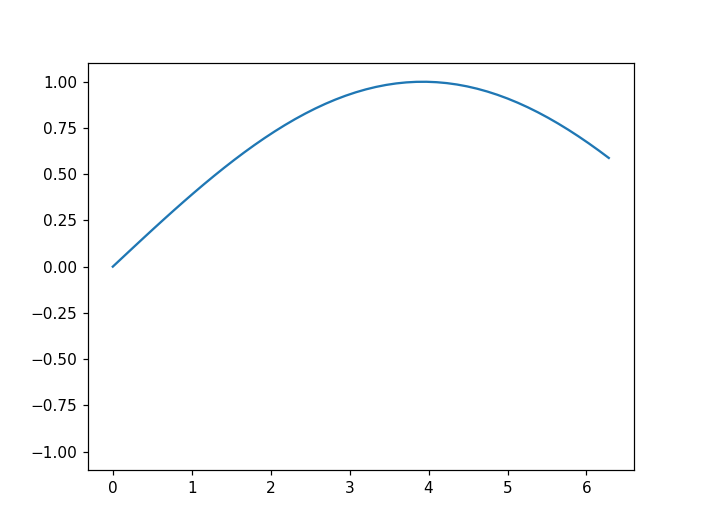

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

<function __main__.update(w=1.0)>

In [40]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw_idle()

interact(update)
